In [1]:
import os
os.chdir('/homes/o23gauvr/Documents/thèse/code/FASCINATION/')


import glob
import torch
import hydra
import matplotlib.pyplot as plt
import numpy as np
from src.utils import get_cfg_from_from_ckpt_path
import xarray as xr

import torch.nn.functional as F

# Utils get ap arch shape from ap ckpt

In [2]:
ap_ckpt_path = "/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/accoustic_predictor_50/dense_2D_CNN_ReLu/pred_weight_1_classif_weight_0_2024-05-18_13-25/checkpoints/val_loss=0.02-epoch=46.ckpt"

In [3]:
splited_path = ap_ckpt_path.split(os.sep)

In [4]:
try:
    index = splited_path.index('checkpoints')
    # Join the components back into a path up to the index before 'checkpoints'
    path_to_config = os.sep.join(splited_path[:index])
except ValueError:
    # If 'checkpoints' is not in the path, return the original path
    print("The given path does not matches the expected structure")
    
config_path = glob.glob(f"{path_to_config}/.hydra/config.yaml")[0]

print(path_to_config)
print(config_path)

/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/accoustic_predictor_50/dense_2D_CNN_ReLu/pred_weight_1_classif_weight_0_2024-05-18_13-25
/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/accoustic_predictor_50/dense_2D_CNN_ReLu/pred_weight_1_classif_weight_0_2024-05-18_13-25/.hydra/config.yaml


In [5]:
with open(config_path,'r') as f:
    config = yaml.safe_load(f)
    
config

{'paths': {'sound': '/DATASET/eNATL/eNATL60_BLB002_sound_speed_regrid_0_1000m.nc',
  'variables': '/DATASET/envs/o23gauvr/tmp/eNATL60_BLB002_ECS_at_0_regrid_0_1000m.nc'},
 'normalization': {'x_min': 1459.0439165829073, 'x_max': 1545.8698054910844},
 'trainer': {'_target_': 'pytorch_lightning.Trainer',
  'inference_mode': False,
  'accelerator': 'gpu',
  'devices': 1,
  'check_val_every_n_epoch': 1,
  'logger': {'_target_': 'pytorch_lightning.loggers.tensorboard.TensorBoardLogger',
   'save_dir': '/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/accoustic_predictor/',
   'name': '${model.arch_shape}',
   'version': 'pred_weight_${model.pred_weight}_classif_weight_${model.classif_weight}_${now:%Y-%m-%d_%H-%M}'},
  'min_epochs': 0,
  'max_epochs': 50,
  'callbacks': [{'_target_': 'pytorch_lightning.callbacks.LearningRateMonitor'},
   {'_target_': 'pytorch_lightning.callbacks.ModelCheckpoint',
    'monitor': 'val_loss',
    'save_top_k': 1,
    'filename': '{val_loss:.2f}-{epoch:02

In [6]:
config['model']['input_depth']

107

In [4]:
import os

In [7]:
os.getcwd()

'/homes/o23gauvr/Documents/thèse/code/FASCINATION/dev'

In [36]:
os.chdir('/homes/o23gauvr/Documents/thèse/code/FASCINATION/')

In [37]:
os.getcwd()

'/homes/o23gauvr/Documents/thèse/code/FASCINATION'

In [17]:
from src.utils import get_cfg_from_from_ckpt_path

import glob

In [18]:
def get_config_file_path_from_ckpt_path(ap_ckpt_path):
    splited_path = ap_ckpt_path.split(os.sep)
    
    try:
        index = splited_path.index('checkpoints')
        # Join the components back into a path up to the index before 'checkpoints'
        path_to_config = os.sep.join(splited_path[:index])
    except ValueError:
        # If 'checkpoints' is not in the path, return the original path
        print("The given path does not match the expected structure")
        
    config_path = glob.glob(f"{path_to_config}/.hydra/config.yaml")[0]
    
    return config_path

In [49]:
def get_cfg_from_from_ckpt_path(ckpt_path):
    
    
    cfg_path = get_config_file_path_from_ckpt_path(ckpt_path)
    cfg_dir_path = ("/").join(cfg_path.split("/")[:-1])
    cfg_name = cfg_path.split("/")[-1].split(".yaml")[0]
    with hydra.initialize_config_dir(cfg_dir_path, version_base='1.3'):
        cfg = hydra.compose(cfg_name)

    return cfg

In [57]:
ap_ckpt_path = "/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/ap_classif/CNN_2D/2024-05-31_18-03/checkpoints/val_loss=0.69-epoch=00.ckpt"

In [58]:
cfg_path = get_config_file_path_from_ckpt_path(ap_ckpt_path)
cfg_dir_path = ("/").join(cfg_path.split("/")[:-1])
cfg_name = cfg_path.split("/")[-1].split(".yaml")[0]

In [46]:
cfg_dir_path

'/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/ap_classif/UNet/2024-05-28_16-04/.hydra'

In [32]:
os.access(cfg_dir_path, os.R_OK)

True

In [50]:
get_cfg_from_from_ckpt_path(ap_ckpt_path)

/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/ap_classif/UNet/2024-05-28_16-04/.hydra


{'paths': {'sound': '/DATASET/eNATL/eNATL60_BLB002_sound_speed_regrid_0_1000m.nc', 'variables': '/DATASET/envs/o23gauvr/tmp/eNATL60_BLB002_ECS_binary_classification_at_0_regrid_0_1000m.nc'}, 'normalization': {'x_min': 1459.0439165829073, 'x_max': 1545.8698054910844}, 'dtype': 'float32', 'trainer': {'_target_': 'pytorch_lightning.Trainer', 'inference_mode': False, 'accelerator': 'gpu', 'devices': 1, 'check_val_every_n_epoch': 1, 'accumulate_grad_batches': 4, 'logger': {'_target_': 'pytorch_lightning.loggers.tensorboard.TensorBoardLogger', 'save_dir': '/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/ap_classif/', 'name': '${model.model_name}', 'version': '${now:%Y-%m-%d_%H-%M}'}, 'min_epochs': 0, 'max_epochs': 1000, 'callbacks': [{'_target_': 'pytorch_lightning.callbacks.LearningRateMonitor'}, {'_target_': 'pytorch_lightning.callbacks.ModelCheckpoint', 'monitor': 'val_loss', 'save_top_k': 1, 'filename': '{val_loss:.2f}-{epoch:02d}', 'mode': 'min'}, {'_target_': 'pytorch_lightnin

In [51]:
from omegaconf import OmegaConf

In [59]:
cfg = OmegaConf.load(cfg_path)

In [60]:
hydra.utils.call(cfg.model)

ECS_classification(
  (model): CNN_2D(
    (net): Sequential(
      (0): Conv2d(3, 20, kernel_size=(1, 1), stride=(1, 1))
      (1): Dim_reduction(
        (net): Sequential(
          (0): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
        )
      )
      (2): Conv2d(20, 40, kernel_size=(1, 1), stride=(1, 1))
      (3): Dim_reduction(
        (net): Sequential(
          (0): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
        )
      )
      (4): Conv2d(40, 60, kernel_size=(1, 1), stride=(1, 1))
      (5): Dim_reduction(
        (net): Sequential(
          (0): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=

# Class 0 over class 1 per test dataset

In [36]:
model_ecs_classif_path = "/homes/o23gauvr/Documents/thèse/code/FASCINATION/outputs/ecs_classif/UNet_3D/2024-06-05_19-46/checkpoints/val_loss=0.14-epoch=04.ckpt"

In [37]:
cfg = get_cfg_from_from_ckpt_path(model_ecs_classif_path, pprint = True)


```yaml

datamodule:
  _target_: src.data.BaseDatamodule_ecs_classif
  dl_kw: {batch_size: '${model_config.batch_size.${dimensions}}', num_workers: 4}
  dtype_str: ${dtype}
  input_da: {_target_: src.utils.load_ssf_ecs_classif_da, ecs_classif_da_path: '${model_config.ECS_classif_path.${model.model_name}}',
    ssf_da_path: '${ssp_path}'}
  model_name: ${model.model_name}
  x_max: ${normalization.x_max}
  x_min: ${normalization.x_min}
dimensions: 3D
dtype: float32
entrypoints:
- {_target_: pytorch_lightning.seed_everything, seed: 333}
- {_target_: src.train.base_training, dm: '${datamodule}', lit_mod: '${model}', trainer: '${trainer}'}
model:
  _target_: src.ecs_classification.ECS_classification
  depth_array: {_target_: src.utils.get_depth_array, ssf_da_path: '${ssp_path}'}
  loss_weight: {ecs_weight: 1, no_ecs_weight: 1}
  model_hparams: ${model_config.model_hparams.${model.model_name}}
  model_name: ${model_architecture}_${dimensions}
  opt_fn: {T_max: '${trainer.max_epochs}', _partial_: true, _target_: src.ecs_classification.ECS_classification.cosanneal_lr_adamw,
    lr: 0.001, weight_decay: 0.01}
model_architecture: UNet
model_config:
  ECS_classif_path: {CNN_2D: /DATASET/envs/o23gauvr/tmp/eNATL60_BLB002_ECS_2D_binary_classification_at_0_regrid_0_1000m.nc,
    CNN_3D: /DATASET/envs/o23gauvr/tmp/eNATL60_BLB002_ECS_2D_binary_classification_at_0_regrid_0_1000m.nc,
    UNet_2D: /DATASET/envs/o23gauvr/tmp/eNATL60_BLB002_ECS_2D_binary_classification_at_0_regrid_0_1000m.nc,
    UNet_3D: /DATASET/envs/o23gauvr/tmp/eNATL60_BLB002_ECS_3D_binary_classification_at_0_regrid_0_1000m.nc}
  accumulate_grad_batches: {2D: 1, 3D: 4}
  batch_size: {2D: 4, 3D: 1}
  model_hparams:
    CNN_2D:
      avg_pool: false
      batch_norm: true
      channels_start: 20
      dtype_str: ${dtype}
      final_act_func_str: Sigmoid
      in_ch: 107
      num_classes: 1
      num_layers: 4
      spatial_dim: [240, 240]
    CNN_3D:
      avg_pool: false
      batch_norm: true
      channels_start: 20
      dtype_str: ${dtype}
      final_act_func_str: Sigmoid
      in_ch: 3
      num_classes: 1
      num_layers: 4
      spatial_dim: [240, 240]
    UNet_2D: {avg_pool: false, batch_norm: true, bilinear: false, dtype_str: '${dtype}',
      features_start: 64, final_act_func_str: Sigmoid, in_ch: 107, num_classes: 1,
      num_layers: 5}
    UNet_3D: {avg_pool: false, batch_norm: true, bilinear: false, dtype_str: '${dtype}',
      features_start: 64, final_act_func_str: Sigmoid, in_ch: 3, num_classes: 1, num_layers: 5}
normalization: {x_max: 1545.8698054910844, x_min: 1459.0439165829073}
ssp_path: /DATASET/eNATL/eNATL60_BLB002_sound_speed_regrid_0_1000m.nc
trainer:
  _target_: pytorch_lightning.Trainer
  accelerator: gpu
  accumulate_grad_batches: ${model_config.accumulate_grad_batches.${dimensions}}
  callbacks:
  - {_target_: pytorch_lightning.callbacks.LearningRateMonitor}
  - {_target_: pytorch_lightning.callbacks.ModelCheckpoint, filename: '{val_loss:.2f}-{epoch:02d}',
    mode: min, monitor: val_loss, save_top_k: 1}
  - {_target_: pytorch_lightning.callbacks.EarlyStopping, check_on_train_epoch_end: true,
    min_delta: 0.0, monitor: val_loss, patience: 3, verbose: true}
  check_val_every_n_epoch: 1
  devices: 1
  inference_mode: false
  logger: {_target_: pytorch_lightning.loggers.tensorboard.TensorBoardLogger, name: '${model.model_name}',
    save_dir: "/homes/o23gauvr/Documents/th\xE8se/code/FASCINATION/outputs/ecs_classif/",
    version: '${now:%Y-%m-%d_%H-%M}'}
  max_epochs: 1000
  min_epochs: 0


```

In [38]:
dm = hydra.utils.call(cfg.datamodule) # will instantiate src.data.BaseDataModule with parameters specified in config
dm.setup(stage="fit") # setup the datamodule see https://lightning.ai/docs/pytorch/stable/data/datamodule.html#lightningdatamodule-api

In [39]:
lit_mod =  hydra.utils.call(cfg.model)
lit_mod.load_state_dict(torch.load(model_ecs_classif_path)["state_dict"]) 
lit_mod

ECS_classification(
  (model): UNet_3D(
    (layers): ModuleList(
      (0): DoubleConv(
        (net): Sequential(
          (0): Conv3d(3, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(64, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 1, 1))
          (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU(inplace=True)
        )
      )
      (1): Down(
        (net): Sequential(
          (0): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
          (1): DoubleConv(
            (net): Sequential(
              (0): Conv3d(64, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 1, 1))
              (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
    

In [40]:
lit_mod = lit_mod.to('cuda:1') # Move model to gpu for faster inference
lit_mod = lit_mod.eval() # Model in eval mode

for param in lit_mod.parameters():
    param.requires_grad = False  # Ensure no gradients are calculated for this model

In [41]:
train_dl = dm.train_dataloader()

In [42]:
ssf_input, ecs_classif_truth = train_dl.dataset.input.data, train_dl.dataset.tgt.data
ssf_input, ecs_classif_truth  = torch.tensor(ssf_input).to(lit_mod.device), torch.tensor(ecs_classif_truth).to(lit_mod.device) 

In [43]:
print(f"\tnumber of class 0: {(ecs_classif_truth == 0).sum().item()}")
print(f"\tnumber of class 1: {(ecs_classif_truth == 1).sum().item()}")
print(f"\tratio of class 1 over class 0: {(ecs_classif_truth == 1).sum().item()/(ecs_classif_truth == 0).sum().item()}")

	number of class 0: 1566987730
	number of class 1: 10791470
	ratio of class 1 over class 0: 0.0068867610086519315


In [44]:
ratio_list = []

for i,train_batch in enumerate(dm.train_dataloader()):
    ssf_input_batch, ecs_classif_truth_batch = train_batch
    print(f"\nbatch n° {i}: ")
    print(f"\tnumber of class 0: {(ecs_classif_truth_batch == 0).sum().item()}")
    print(f"\tnumber of class 1: {(ecs_classif_truth_batch == 1).sum().item()}")
    print(f"\tratio of class 1 over class 0: {(ecs_classif_truth_batch == 1).sum().item()/(ecs_classif_truth_batch == 0).sum().item()}")
    ratio_list.append((ecs_classif_truth_batch == 1).sum().item()/(ecs_classif_truth_batch == 0).sum().item())
    


batch n° 0: 
	number of class 0: 6143227
	number of class 1: 19973
	ratio of class 1 over class 0: 0.0032512228507916114

batch n° 1: 
	number of class 0: 6156956
	number of class 1: 6244
	ratio of class 1 over class 0: 0.0010141375056115392

batch n° 2: 
	number of class 0: 6131640
	number of class 1: 31560
	ratio of class 1 over class 0: 0.005147073213691606

batch n° 3: 
	number of class 0: 6105927
	number of class 1: 57273
	ratio of class 1 over class 0: 0.009379902511117477

batch n° 4: 
	number of class 0: 6105737
	number of class 1: 57463
	ratio of class 1 over class 0: 0.00941131267200012

batch n° 5: 
	number of class 0: 6127559
	number of class 1: 35641
	ratio of class 1 over class 0: 0.005816508661932101

batch n° 6: 
	number of class 0: 6113667
	number of class 1: 49533
	ratio of class 1 over class 0: 0.00810201144419544

batch n° 7: 
	number of class 0: 6142748
	number of class 1: 20452
	ratio of class 1 over class 0: 0.003329454504726549

batch n° 8: 
	number of class 0:

Text(0.5, 1.0, 'Ratio of class 1 (ECS existence) over class 0 (no ECS)')

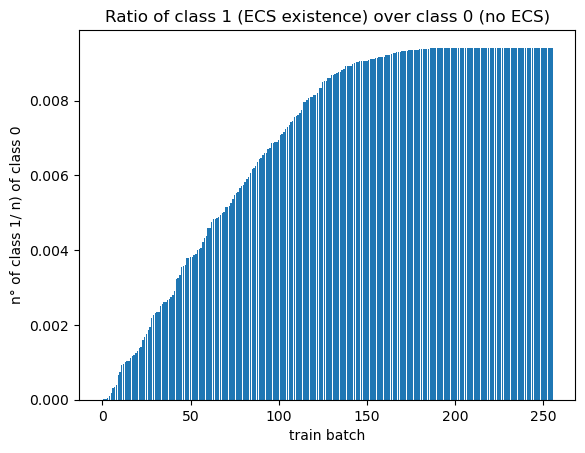

In [45]:
plt.bar(np.arange(len(ratio_list)),np.sort(ratio_list))
plt.ylabel("n° of class 1/ n) of class 0")
plt.xlabel("train batch")
plt.title("Ratio of class 1 (ECS existence) over class 0 (no ECS)")

Text(0, 0.5, 'ECS class')

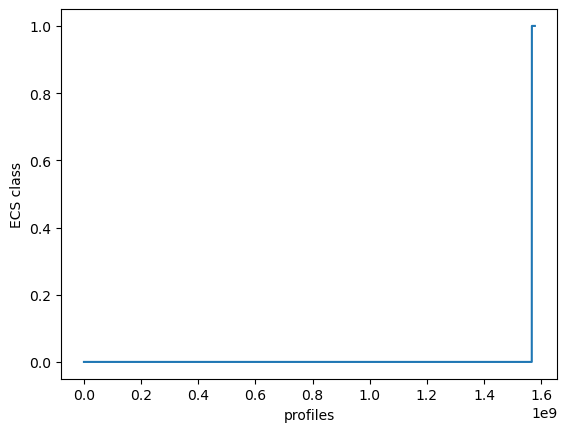

In [46]:
plt.plot(np.sort(ecs_classif_truth.flatten().cpu().detach().numpy()))
plt.xlabel("profiles")
plt.ylabel("ECS class")

In [47]:
1/0.0068867610086519315

145.20614244398584

: 

# ECS through conv1D

In [2]:
ssp_path = "/DATASET/eNATL/eNATL60_BLB002_sound_speed_regrid_0_1000m.nc"
ecs_path = "/DATASET/envs/o23gauvr/tmp/eNATL60_BLB002_ECS_at_0_regrid_0_1000m.nc"

In [3]:
ssf_arr = xr.open_dataarray(ssp_path).data
ecs_arr = xr.open_dataarray(ecs_path).data


In [24]:
ecs_arr.nonzero()

(array([  0,   0,   0, ..., 364, 364, 364]),
 array([  0,   0,   0, ..., 229, 229, 235]),
 array([  0,   1,   2, ..., 188, 189, 231]))

In [42]:
ecs_arr[364,235,231]

141.3820115025511

In [43]:
ssf_arr[364,:,235,231]

array([1491.00479648, 1491.09163658, 1491.51755142, 1491.93500344,
       1492.37671277, 1492.82795051, 1493.23370797, 1493.4730421 ,
       1493.74689009, 1494.02766149, 1494.30661804, 1494.58562211,
       1494.86960144, 1495.16823323, 1495.49535351, 1495.86712814,
       1496.27902948, 1496.69613516, 1497.08055671, 1497.43840946,
       1497.78070178, 1498.12267404, 1498.48147989, 1498.86919889,
       1499.29493853, 1499.75915294, 1500.24308701, 1500.72612501,
       1501.18706087, 1501.61472727, 1502.00708215, 1502.36850669,
       1502.70972687, 1503.03135549, 1503.31852277, 1503.53254644,
       1503.61459263, 1503.56103144, 1503.45085011, 1503.31053534,
       1503.14518869, 1502.97898735, 1502.82108444, 1502.66411627,
       1502.48634719, 1502.26061249, 1501.9695366 , 1501.60877309,
       1501.17718292, 1500.6677739 , 1500.08080681, 1499.41907638,
       1498.68966866, 1497.90477865, 1497.07858111, 1496.2277727 ,
       1495.37356693, 1494.53181471, 1493.70570887, 1492.89123

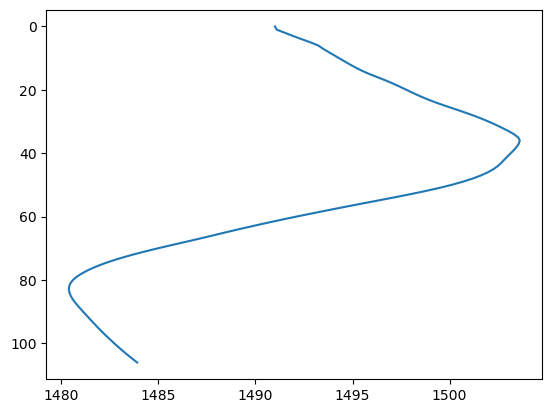

In [44]:
plt.plot(ssf_arr[364,:,235,231],np.arange(107))
plt.gca().invert_yaxis()

In [45]:
import torch.nn.functional as F

In [60]:
input_sequence = torch.tensor(ssf_arr[364,:,235,231]).unsqueeze(0).unsqueeze(0) 
input_sequence.shape

torch.Size([1, 1, 107])

In [61]:
kernel = torch.tensor([-1.0, 0.0, 1.0]).double().unsqueeze(0).unsqueeze(0)
kernel.shape

torch.Size([1, 1, 3])

In [62]:
derivative = F.conv1d(input_sequence, kernel, padding=1)
derivative.shape

torch.Size([1, 1, 107])

In [68]:
derivative = derivative.squeeze()
derivative


tensor([ 1.4911e+03,  5.1275e-01,  8.4337e-01,  8.5916e-01,  8.9295e-01,
         8.5700e-01,  6.4509e-01,  5.1318e-01,  5.5462e-01,  5.5973e-01,
         5.5796e-01,  5.6298e-01,  5.8261e-01,  6.2575e-01,  6.9889e-01,
         7.8368e-01,  8.2901e-01,  8.0153e-01,  7.4227e-01,  7.0015e-01,
         6.8426e-01,  7.0078e-01,  7.4652e-01,  8.1346e-01,  8.8995e-01,
         9.4815e-01,  9.6697e-01,  9.4397e-01,  8.8860e-01,  8.2002e-01,
         7.5378e-01,  7.0264e-01,  6.6285e-01,  6.0880e-01,  5.0119e-01,
         2.9607e-01,  2.8485e-02, -1.6374e-01, -2.5050e-01, -3.0566e-01,
        -3.3155e-01, -3.2410e-01, -3.1487e-01, -3.3474e-01, -4.0350e-01,
        -5.1681e-01, -6.5184e-01, -7.9235e-01, -9.4100e-01, -1.0964e+00,
        -1.2487e+00, -1.3911e+00, -1.5143e+00, -1.6111e+00, -1.6770e+00,
        -1.7050e+00, -1.6960e+00, -1.6679e+00, -1.6406e+00, -1.6156e+00,
        -1.5779e+00, -1.5281e+00, -1.4831e+00, -1.4445e+00, -1.4007e+00,
        -1.3611e+00, -1.3574e+00, -1.3878e+00, -1.4

In [71]:
sign = torch.sign(derivative)
sign

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.], dtype=torch.float64)

In [73]:
sign_diff = sign[1:] - sign[:-1] ##? conv1D kernel [-1.0, 1.0]
sign_diff

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -2.], dtype=torch.float64)

In [80]:
F.conv1d(sign.unsqueeze(0).unsqueeze(0),  torch.tensor([-1.0, 1.0]).double().unsqueeze(0).unsqueeze(0), padding=0)

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0., -2.]]], dtype=torch.float64)

In [76]:
first_sign_change_index = (sign_diff != 0).nonzero(as_tuple=True)[0]
first_sign_change_index = first_sign_change_index[0].item() if len(first_sign_change_index) > 0 else None
first_sign_change_index

36

In [149]:
def get_ecs(ssp: torch.tensor):

    kernel = torch.tensor([-1.0, 0.0, 1.0]).double().unsqueeze(0).unsqueeze(0)
    derivative = F.conv1d(ssp, kernel, padding=1)

    derivative = derivative.squeeze()
    sign = torch.sign(derivative)


    sign_diff = sign[1:] - sign[:-1]
    ##ou F.conv1d(sign.unsqueeze(0).unsqueeze(0),  torch.tensor([-1.0, 1.0]).double().unsqueeze(0).unsqueeze(0), padding=0)

    first_sign_change_index = (sign_diff != 0).nonzero(as_tuple=True)[0]
    first_sign_change_index = first_sign_change_index[0].item() if len(first_sign_change_index) > 0 else None
    
    return first_sign_change_index


In [178]:
ssp = torch.tensor(ssf_arr[364,:,235,231], requires_grad=True).unsqueeze(0).unsqueeze(0) 

In [179]:
ssp

tensor([[[1491.0048, 1491.0916, 1491.5176, 1491.9350, 1492.3767, 1492.8280,
          1493.2337, 1493.4730, 1493.7469, 1494.0277, 1494.3066, 1494.5856,
          1494.8696, 1495.1682, 1495.4954, 1495.8671, 1496.2790, 1496.6961,
          1497.0806, 1497.4384, 1497.7807, 1498.1227, 1498.4815, 1498.8692,
          1499.2949, 1499.7592, 1500.2431, 1500.7261, 1501.1871, 1501.6147,
          1502.0071, 1502.3685, 1502.7097, 1503.0314, 1503.3185, 1503.5325,
          1503.6146, 1503.5610, 1503.4509, 1503.3105, 1503.1452, 1502.9790,
          1502.8211, 1502.6641, 1502.4863, 1502.2606, 1501.9695, 1501.6088,
          1501.1772, 1500.6678, 1500.0808, 1499.4191, 1498.6897, 1497.9048,
          1497.0786, 1496.2278, 1495.3736, 1494.5318, 1493.7057, 1492.8912,
          1492.0901, 1491.3134, 1490.5619, 1489.8303, 1489.1174, 1488.4295,
          1487.7563, 1487.0722, 1486.3685, 1485.6571, 1484.9593, 1484.2941,
          1483.6691, 1483.0922, 1482.5687, 1482.1018, 1481.6937, 1481.3384,
          14

In [86]:
kernel = torch.tensor([-1.0, 0.0, 1.0]).double().unsqueeze(0).unsqueeze(0)
derivative = F.conv1d(ssp, kernel, padding=1)

derivative = derivative.squeeze()
sign = torch.sign(derivative)
sign.grad_fn

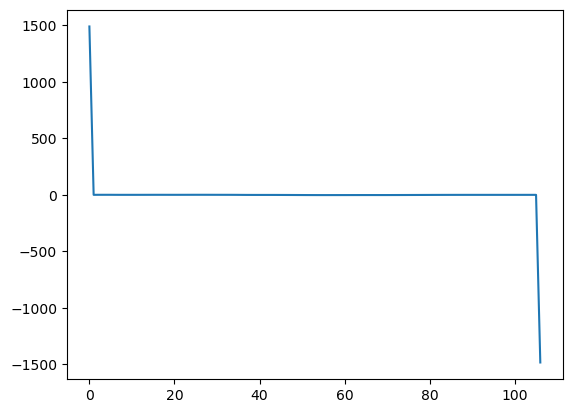

In [90]:
plt.plot(derivative.cpu().detach().numpy())

In [153]:
sign_diff = sign[1:] - sign[:-1]
##ou F.conv1d(sign.unsqueeze(0).unsqueeze(0),  torch.tensor([-1.0, 1.0]).double().unsqueeze(0).unsqueeze(0), padding=0)

first_sign_change_index = (sign_diff != 0).nonzero(as_tuple=True)[0]
first_sign_change_index

tensor([ 36,  82, 105])

In [155]:
(sign_diff != 0).nonzero()

tensor([[ 36],
        [ 82],
        [105]])

In [127]:
derivative

tensor([ 1.4911e+03,  5.1275e-01,  8.4337e-01,  8.5916e-01,  8.9295e-01,
         8.5700e-01,  6.4509e-01,  5.1318e-01,  5.5462e-01,  5.5973e-01,
         5.5796e-01,  5.6298e-01,  5.8261e-01,  6.2575e-01,  6.9889e-01,
         7.8368e-01,  8.2901e-01,  8.0153e-01,  7.4227e-01,  7.0015e-01,
         6.8426e-01,  7.0078e-01,  7.4652e-01,  8.1346e-01,  8.8995e-01,
         9.4815e-01,  9.6697e-01,  9.4397e-01,  8.8860e-01,  8.2002e-01,
         7.5378e-01,  7.0264e-01,  6.6285e-01,  6.0880e-01,  5.0119e-01,
         2.9607e-01,  2.8485e-02, -1.6374e-01, -2.5050e-01, -3.0566e-01,
        -3.3155e-01, -3.2410e-01, -3.1487e-01, -3.3474e-01, -4.0350e-01,
        -5.1681e-01, -6.5184e-01, -7.9235e-01, -9.4100e-01, -1.0964e+00,
        -1.2487e+00, -1.3911e+00, -1.5143e+00, -1.6111e+00, -1.6770e+00,
        -1.7050e+00, -1.6960e+00, -1.6679e+00, -1.6406e+00, -1.6156e+00,
        -1.5779e+00, -1.5281e+00, -1.4831e+00, -1.4445e+00, -1.4007e+00,
        -1.3611e+00, -1.3574e+00, -1.3878e+00, -1.4

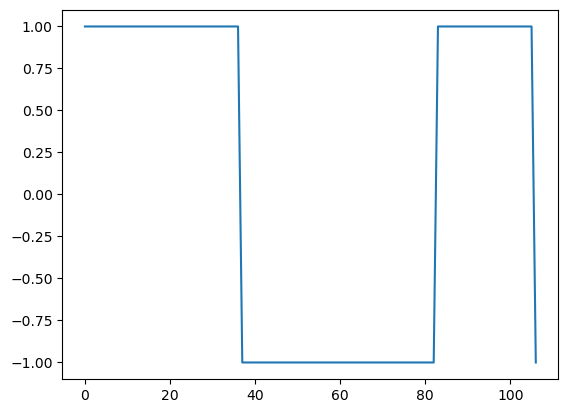

In [157]:
y = differentiable_sign(derivative).detach().numpy()
plt.plot(y)

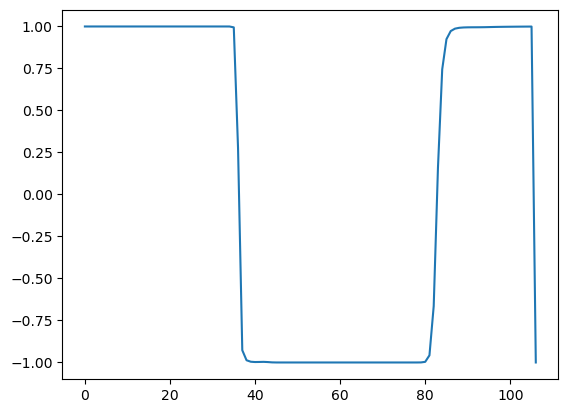

In [148]:
y = F.tanh(derivative*10).detach().numpy()
plt.plot(y)
        

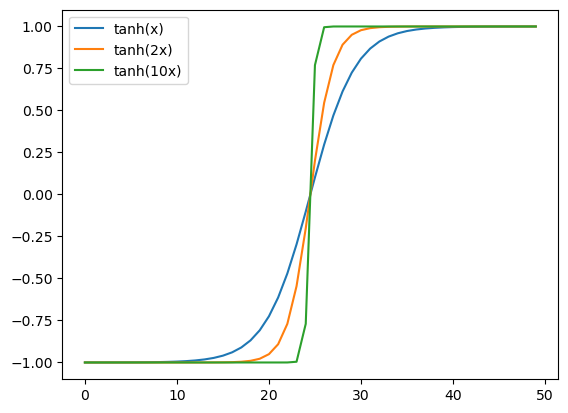

In [152]:
x = np.linspace(-5,5)
#plt.plot(x, label = "x")
plt.plot(np.tanh(x), label="tanh(x)")
plt.plot(np.tanh(x*2), label="tanh(2x)")
plt.plot(np.tanh(x*10), label="tanh(10x)")
plt.legend()

In [162]:
-sign_diff

tensor([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0.,  2., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -2., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0.,  2.], dtype=torch.float64,
       grad_fn=<NegBackward0>)

In [167]:
sign_change = F.relu(-0.5*sign_diff)
sign_change

tensor([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 1.],
       dtype=torch.float64, grad_fn=<ReluBackward0>)

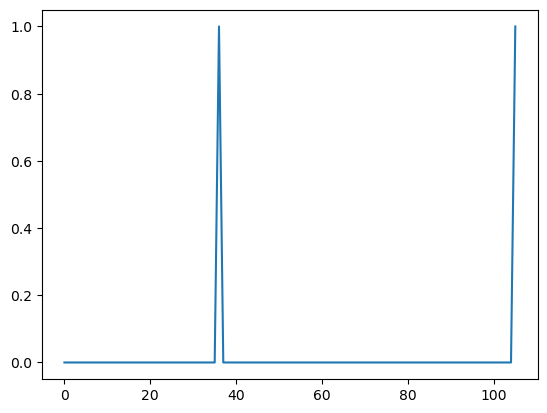

In [168]:
plt.plot(sign_change.detach().numpy())

In [169]:
torch.cumsum(sign_change, dim=0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       dtype=torch.float64, grad_fn=<CumsumBackward0>)

In [174]:
mask = (torch.cumsum(sign_change, dim=0) == 1).float()
mask

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [175]:
sign_change * mask

tensor([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0.],
       dtype=torch.float64, grad_fn=<MulBackward0>)

In [8]:
class DifferentiableSign(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input: torch.tensor, tau: float):

        ctx.save_for_backward(input)
        ctx.tau = tau
        return torch.sign(input)

    @staticmethod
    def backward(ctx, grad_output):

        input, = ctx.saved_tensors
        tau = ctx.tau
        
        # Compute tanh with temperature in the backward pass
        input_scaled = input * tau
        tanh_grad = F.tanh(input_scaled)
        
        return grad_output * tanh_grad, None
    
    
def differentiable_sign(input, tau: float = 10):
    return DifferentiableSign.apply(input, tau)

In [177]:
def get_differentiable_ecs(ssp: torch.tensor):
    kernel = torch.tensor([-1.0, 0.0, 1.0]).double().unsqueeze(0).unsqueeze(0)
    derivative = F.conv1d(ssp, kernel, padding=1)

    derivative = derivative.squeeze()
    sign = differentiable_sign(derivative)


    sign_diff = sign[1:] - sign[:-1]
    ##ou sign_diff = F.conv1d(sign.unsqueeze(0).unsqueeze(0),  torch.tensor([-1.0, 1.0]).double().unsqueeze(0).unsqueeze(0), padding=0)

    sign_change = F.relu(-0.5*sign_diff)
    
    mask = (torch.cumsum(sign_change, dim=0) == 1).float()
    first_sign_change_index = sign_change * mask
    
    return first_sign_change_index

In [180]:
get_ecs(ssp)

36

In [185]:
get_differentiable_ecs(ssp)

tensor([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0.],
       dtype=torch.float64, grad_fn=<MulBackward0>)

In [9]:
ssf_batch = torch.tensor(ssf_arr[:,:,:,:])
ssf_batch = ssf_batch.reshape(365,107,-1).unsqueeze(1)
ssf_batch.shape

torch.Size([365, 1, 107, 57600])

In [12]:
kernel = torch.tensor([-1.0, 0.0, 1.0]).double().unsqueeze(0).unsqueeze(0).unsqueeze(-1)
derivative = F.conv2d(ssf_batch, kernel, padding=(1,0))
derivative.shape

torch.Size([365, 1, 107, 57600])

In [13]:
sign = differentiable_sign(derivative)
sign.shape

torch.Size([365, 1, 107, 57600])

In [14]:
F.tanh(derivative).shape

torch.Size([365, 1, 107, 57600])

In [15]:
sign_diff = F.conv2d(sign,  torch.tensor([-1.0, 1.0, 0.]).double().unsqueeze(0).unsqueeze(0).unsqueeze(-1), padding=(1,0))
sign_diff.shape

torch.Size([365, 1, 107, 57600])

In [17]:
sign_change = F.relu(-0.5*sign_diff)

mask = (torch.cumsum(sign_change, dim=2) == 1).float()
first_sign_change_index = sign_change * mask
first_sign_change_index.shape

torch.Size([365, 1, 107, 57600])

In [18]:
first_sign_change_index= first_sign_change_index.squeeze().reshape(365,107,240,240)
first_sign_change_index.shape

torch.Size([365, 107, 240, 240])

In [19]:

first_sign_change_index = first_sign_change_index.short()
first_sign_change_index

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 1, 1, 1],
          [0, 0, 0,  ..., 1, 1, 1],
          [0, 0, 0,  ..., 1, 1, 1],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [0, 1, 1,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 

In [20]:
z = xr.open_dataarray(ssp_path).z.data

In [21]:
z_tensor = torch.tensor(z).unsqueeze(0).unsqueeze(-1).unsqueeze(-1)

In [22]:
(first_sign_change_index * z_tensor).shape

torch.Size([365, 107, 240, 240])

In [23]:
ecs_arr[364,235,231]

141.3820115025511

In [24]:
ecs_arr[0,0,0]

2.794210420277172

In [25]:
ecs_arr[25,25,25]

0.0

In [26]:
first_sign_change_index[364,:,235,231]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int16)

In [27]:
first_sign_change_index[0,:,0,0]

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int16)

In [29]:
(first_sign_change_index * z_tensor)[364,:,235,231]

tensor([  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000, 148.3498,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.00

In [2]:
tensor_1 = torch.tensor([0., 2., 0., 0., 0., 0., 0., 0., 0., 2.,0.])
tensor_2 = torch.tensor([1., 0., 0., 0., 0., 0., 2., 0., 0., 0.,0.])
tensor_3 = torch.tensor([0., 0., 0., 0., 0., 0., 2., 1., 0., 0.,0.])

In [8]:
F.sigmoid((tensor_2+1))

tensor([0.8808, 0.7311, 0.7311, 0.7311, 0.7311, 0.7311, 0.9526, 0.7311, 0.7311,
        0.7311, 0.7311])

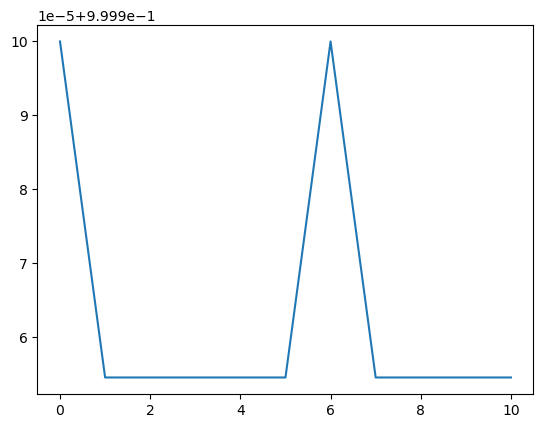

In [9]:
plt.plot(F.sigmoid(10*(tensor_2+1)))

In [17]:
F.tanh(10*tensor_2)

tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

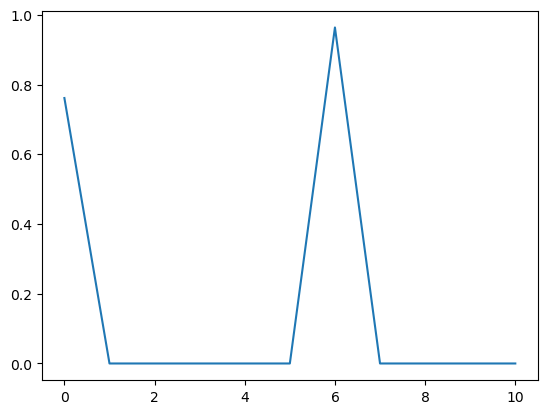

In [12]:
plt.plot(F.tanh(tensor_2))